In [1]:
import tensorflow as tf

C:\Users\jmeono\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np

## Carga de datos

In [3]:
## Carga de datos 
archibinario = "proyecto_training_data.npy"
datoscompletos = np.load(archibinario)

## Partiendo los datos 

## Datos de entrenamiento 80%

In [4]:
## haciendo slicing al dataset 
datosentrenamiento = datoscompletos [:1168,]

print(datosentrenamiento)
print("Tensor de rango", datosentrenamiento.ndim) ## viendo el rango del tensor
print("Forma de la matriz", datosentrenamiento.shape) ## revisando el total de filas y columnas 
print("Total de filas", datosentrenamiento.shape[0]) ## extrayendo el numero total de filas
print("Total de columnas", datosentrenamiento.shape[1]) ## extrayendo el numero total de columnas
print("Última fila",datosentrenamiento[-1])

[[2.0850e+05 7.0000e+00 8.5600e+02 8.0000e+00 2.0030e+03 6.5000e+01]
 [1.8150e+05 6.0000e+00 1.2620e+03 6.0000e+00 1.9760e+03 8.0000e+01]
 [2.2350e+05 7.0000e+00 9.2000e+02 6.0000e+00 2.0010e+03 6.8000e+01]
 ...
 [2.3317e+05 7.0000e+00 1.5020e+03 7.0000e+00 2.0090e+03 7.9000e+01]
 [2.4535e+05 8.0000e+00 1.6940e+03 7.0000e+00 2.0080e+03 6.4000e+01]
 [1.7300e+05 6.0000e+00 9.5900e+02 7.0000e+00 2.0000e+03 5.8000e+01]]
Tensor de rango 2
Forma de la matriz (1168, 6)
Total de filas 1168
Total de columnas 6
Última fila [1.73e+05 6.00e+00 9.59e+02 7.00e+00 2.00e+03 5.80e+01]


## Datos de validación 20%

In [5]:
## haciendo slicing al dataset 
datosvaliprue = datoscompletos [1168:,]

print(datosvaliprue)
print("Tensor de rango", datosvaliprue.ndim) ## viendo el rango del tensor
print("Forma de la matriz", datosvaliprue.shape) ## revisando el total de filas y columnas 
print("Total de filas", datosvaliprue.shape[0]) ## extrayendo el numero total de filas
print("Total de columnas", datosvaliprue.shape[1]) ## extrayendo el numero total de columnas
print("Primera fila",datosvaliprue[0])

[[2.35000e+05 6.00000e+00 1.23600e+03 7.00000e+00 1.93500e+03 1.20000e+02]
 [6.25000e+05 1.00000e+01 1.83100e+03 1.00000e+01 1.99500e+03 1.18000e+02]
 [1.71000e+05 6.00000e+00 1.11800e+03 6.00000e+00 1.97700e+03 7.60000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]
Tensor de rango 2
Forma de la matriz (292, 6)
Total de filas 292
Total de columnas 6
Primera fila [2.350e+05 6.000e+00 1.236e+03 7.000e+00 1.935e+03 1.200e+02]


## Elección de la variable con más potencial predictivo

### Se ecoge x1 con un coeficiente de correlación de 0.79 

## Primer grafo

In [6]:
grafo1 = tf.Graph()
with grafo1.as_default():
    # cargando datos como constantes 
    yentreno = tf.constant(np.reshape(datosentrenamiento[:,0],(1168,1)))
    xentreno = tf.constant(np.reshape(datosentrenamiento[:,1],(1168,1)))
    yprueba = tf.constant(np.reshape(datosvaliprue[:,0],(292,1)))
    xprueba = tf.constant(np.reshape(datosvaliprue[:,1],(292,1)))
    
    #placeholder = 
    ph_lr = tf.placeholder(dtype = tf.float64)    
  
    # definiendo los parametros o estimadores beta 1 y beta 2 como
    # variables
    #estimadores = tf.Variable(np.array([[0],
                                        #[0]]))
    estim0 = tf.Variable(0.0, name = "B0", dtype = tf.float64)
    estim1 = tf.Variable(0.0, name = "B1", dtype = tf.float64)     
    
    # entrenamiento
    #yhat = tf.matmul(xentreno, estimadores)
    # hipotesis 
    yhat = tf.add(tf.multiply(xentreno, estim1), estim0)
    
    # costo
    error = (tf.reduce_mean(tf.pow(yentreno-yhat,2)))*0.5
    
    ##para tensorboard
    first_summary = tf.summary.scalar(name='My_first_scalar_summary', tensor=error)
    
    # gradient descent un nodo mas del grafo
    optimizacion = tf.train.GradientDescentOptimizer(ph_lr).minimize(error)   

## Representación del grafo
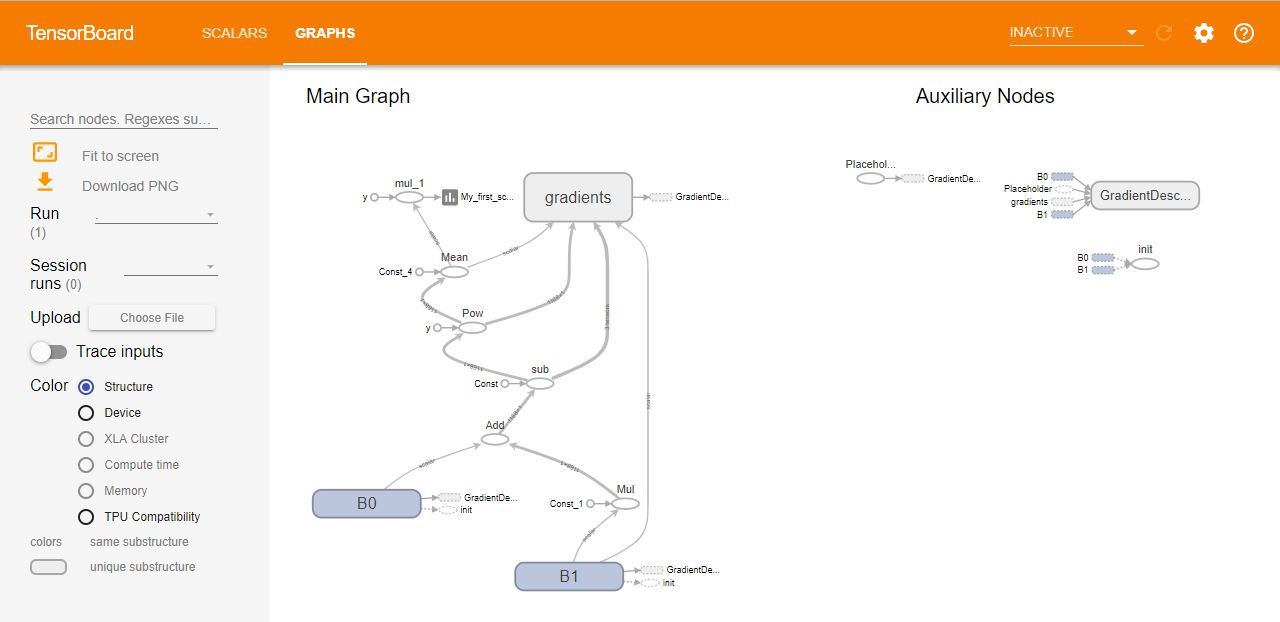

## Primera sesion 

In [7]:
# epochs 
num_steps = 20

with tf.Session(graph = grafo1) as session:
    # incializando variables
    tf.global_variables_initializer().run()
    print('Initialized')
    writer = tf.summary.FileWriter('./graphs', session.graph)
    for step in range(num_steps): 
        # sesion que ejecuta los nodos y envia informacion con feed_dict al nodo del learning rate
        erro, optimi = session.run([error, optimizacion],feed_dict={ph_lr:10.0})
        summary = session.run(first_summary)
        writer.add_summary(summary, step)
        if (step % 2 == 0):
            print("Iteracion:", step, "Error:", erro, "Beta1:", session.run(estim1), "Beta0:", session.run(estim0))
    
    
    

Initialized
Iteracion: 0 Error: 19409722053.22175 Beta1: 11879476.738013698 Beta0: 1805902.7739726028
Iteracion: 2 Error: 4.599165979011942e+20 Beta1: 1892177310679.6538 Beta0: 295456331982.5076
Iteracion: 4 Error: 1.174153854819243e+31 Beta1: 3.023324637450815e+17 Beta0: 4.72080851051616e+16
Iteracion: 6 Error: 2.9975810420448456e+41 Beta1: 4.830674176285757e+22 Beta0: 7.542917317081993e+21
Iteracion: 8 Error: 7.652738239325539e+51 Beta1: 7.718460898434405e+27 Beta0: 1.2052088434742144e+27
Iteracion: 10 Error: 1.95372207584034e+62 Beta1: 1.2332572321502977e+33 Beta0: 1.9256851100554983e+32
Iteracion: 12 Error: 4.987796302781075e+72 Beta1: 1.9705008818008264e+38 Beta0: 3.076863535451489e+37
Iteracion: 14 Error: 1.2733700594203483e+83 Beta1: 3.148470265532256e+43 Beta0: 4.916218735013313e+42
Iteracion: 16 Error: 3.2508771605690325e+93 Beta1: 5.0306321121163254e+48 Beta0: 7.8551441661352e+47
Iteracion: 18 Error: 8.299395949297034e+103 Beta1: 8.037954089802256e+53 Beta0: 1.255096512108318

## Gráfica error en el tiempo
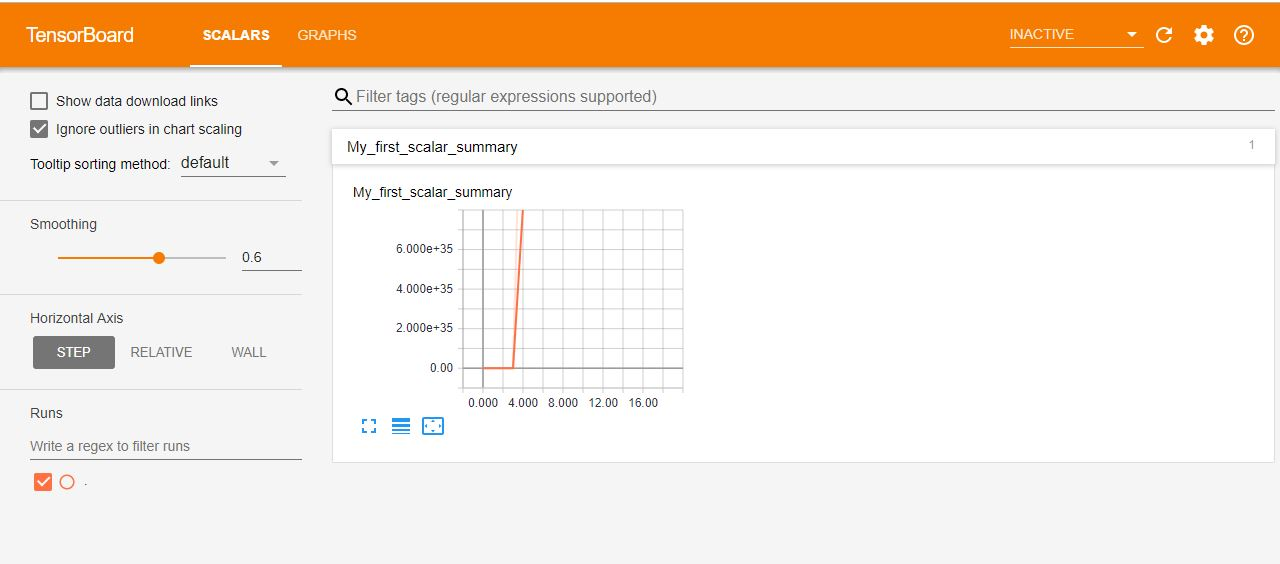

## Segunda sesion 

In [8]:
# epochs 
num_steps = 20

with tf.Session(graph = grafo1) as session2:
    # incializando variables
    tf.global_variables_initializer().run()
    print('Initialized')
    writer = tf.summary.FileWriter('./graphs2', session2.graph)
    for step in range(num_steps): 
        erro, optimi = session2.run([error, optimizacion],feed_dict={ph_lr:1})
        summary = session2.run(first_summary)
        writer.add_summary(summary, step)
        if (step % 2 == 0):
            print("Iteracion:", step, "Error:", erro, "Beta1:", session2.run(estim1), "Beta0:", session2.run(estim0))  

Initialized
Iteracion: 0 Error: 19409722053.22175 Beta1: 1187947.6738013697 Beta0: 180590.27739726027
Iteracion: 2 Error: 4.198736953211883e+16 Beta1: 1767255346.7299414 Beta0: 275936297.83559567
Iteracion: 4 Error: 9.785976057427812e+22 Beta1: 2697952202783.974 Beta0: 421275138232.0116
Iteracion: 6 Error: 2.280812814548897e+29 Beta1: 4118859651756550.5 Beta0: 643144552057381.2
Iteracion: 8 Error: 5.315879647040409e+35 Beta1: 6.288104370696667e+18 Beta0: 9.818640135612294e+17
Iteracion: 10 Error: 1.2389695568861301e+42 Beta1: 9.599806723261272e+21 Beta0: 1.4989739678365843e+21
Iteracion: 12 Error: 2.887660490480114e+48 Beta1: 1.4655655137251248e+25 Beta0: 2.2884258158133892e+24
Iteracion: 14 Error: 6.730256657183051e+54 Beta1: 2.237422415824135e+28 Beta0: 3.493651542220885e+27
Iteracion: 16 Error: 1.5686177381616225e+61 Beta1: 3.415786616122012e+31 Beta0: 5.333623233106168e+30
Iteracion: 18 Error: 3.6559699485593616e+67 Beta1: 5.214749849809058e+34 Beta0: 8.142637137373493e+33


## Gráfica error en el tiempo
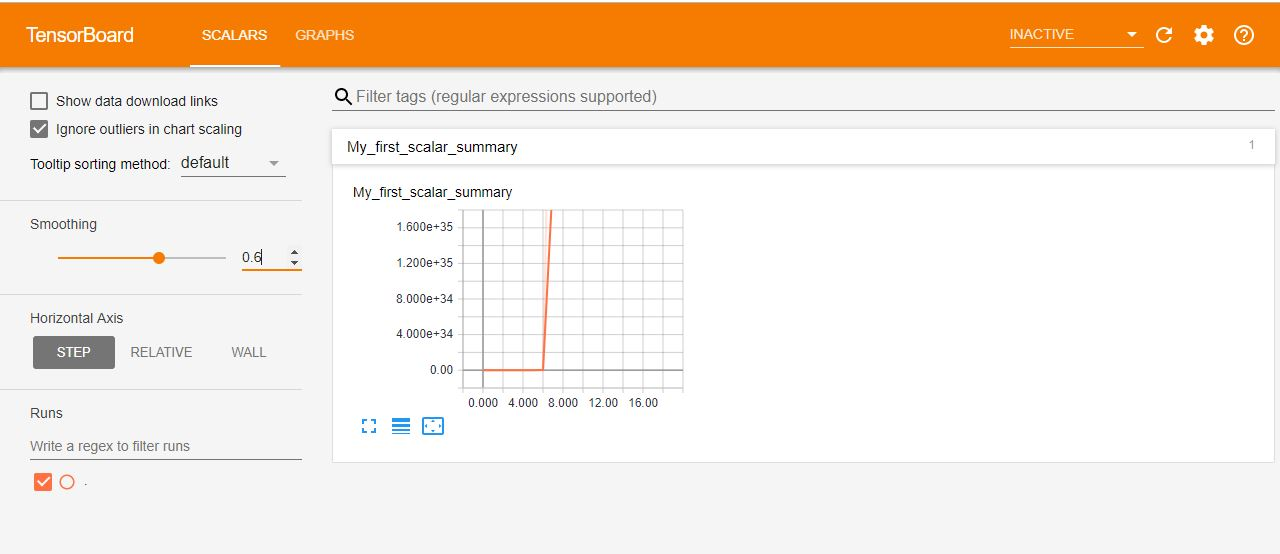


## Tercera sesion 

In [9]:
# epochs 
num_steps = 20

with tf.Session(graph = grafo1) as session3:
    # incializando variables
    tf.global_variables_initializer().run()
    print('Initialized')
    writer = tf.summary.FileWriter('./graphs3', session3.graph)
    for step in range(num_steps): 
        erro, optimi = session3.run([error, optimizacion],feed_dict={ph_lr:0.1})
        summary = session3.run(first_summary)
        writer.add_summary(summary, step)
        if (step % 2 == 0):
            print("Iteracion:", step, "Error:", erro, "Beta1:", session3.run(estim1), "Beta0:", session3.run(estim0))  

Initialized
Iteracion: 0 Error: 19409722053.22175 Beta1: 118794.76738013698 Beta0: 18059.02773972603
Iteracion: 2 Error: 1474761375440.7432 Beta1: 835574.1204399094 Beta0: 129007.73751476425
Iteracion: 4 Error: 120502547628807.31 Beta1: 7316617.379177434 Beta0: 1140033.9272875185
Iteracion: 6 Error: 9855311023202360.0 Beta1: 65927149.82447086 Beta0: 10290894.279479671
Iteracion: 8 Error: 8.060264865518024e+17 Beta1: 595973959.8531443 Beta0: 93054777.7484756
Iteracion: 10 Error: 6.592169281403211e+19 Beta1: 5389483976.49208 Beta0: 841542527.290602
Iteracion: 12 Error: 5.391472443170939e+21 Beta1: 48739887758.784294 Beta0: 7610545250.360865
Iteracion: 14 Error: 4.409470367829299e+23 Beta1: 440781950043.98895 Beta0: 68826448213.13461
Iteracion: 16 Error: 3.6063300201779485e+25 Beta1: 3986238637613.291 Beta0: 622436267995.6832
Iteracion: 18 Error: 2.9494735488695757e+27 Beta1: 36049795934814.336 Beta0: 5629040992611.35


## Gráfica error en el tiempo
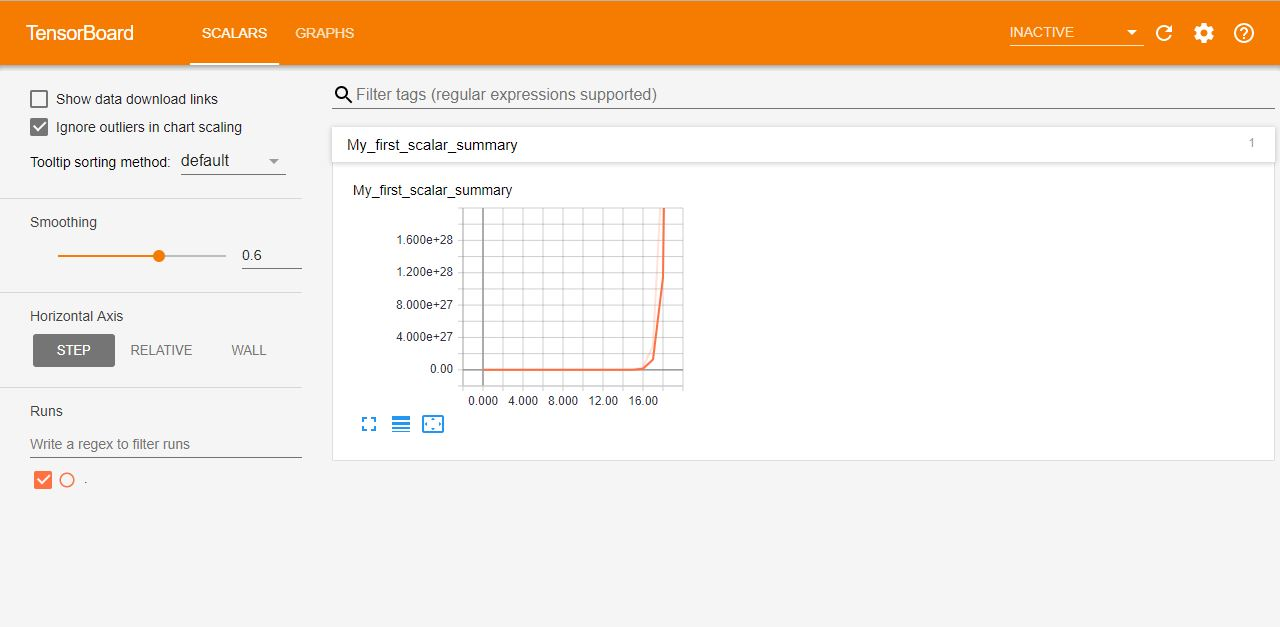

## Cuarta sesion 

In [10]:
# epochs 
num_steps = 20

with tf.Session(graph = grafo1) as session4:
    # incializando variables
    tf.global_variables_initializer().run()
    print('Initialized')
    writer = tf.summary.FileWriter('./graphs4', session4.graph)
    for step in range(num_steps): 
        erro, optimi = session4.run([error, optimizacion],feed_dict={ph_lr:0.01})
        summary = session4.run(first_summary)
        writer.add_summary(summary, step)
        if (step % 2 == 0):
            print("Iteracion:", step, "Error:", erro, "Beta1:", session4.run(estim1), "Beta0:", session4.run(estim0))  

Initialized
Iteracion: 0 Error: 19409722053.22175 Beta1: 11879.476738013698 Beta0: 1805.9027739726027
Iteracion: 2 Error: 3717770447.2485743 Beta1: 23272.60317825021 Beta0: 3486.9002491352167
Iteracion: 4 Error: 1693499585.3201866 Beta1: 27373.779446738266 Beta0: 4029.37971362087
Iteracion: 6 Error: 1432013147.1072414 Beta1: 28856.186135910168 Beta0: 4163.04077637093
Iteracion: 8 Error: 1397881894.3230958 Beta1: 29398.1041799059 Beta0: 4149.940649695313
Iteracion: 10 Error: 1393074454.2065675 Beta1: 29602.255186377413 Beta0: 4084.191974002787
Iteracion: 12 Error: 1392049808.2823176 Beta1: 29685.094778536117 Beta0: 3999.5933988863003
Iteracion: 14 Error: 1391513812.4658086 Beta1: 29724.358746045444 Beta0: 3908.282990084421
Iteracion: 16 Error: 1391041604.3933308 Beta1: 29747.964377854983 Beta0: 3814.619840587182
Iteracion: 18 Error: 1390578386.1651585 Beta1: 29765.937627907548 Beta0: 3720.169378324096


## Gráfica error en el tiempo
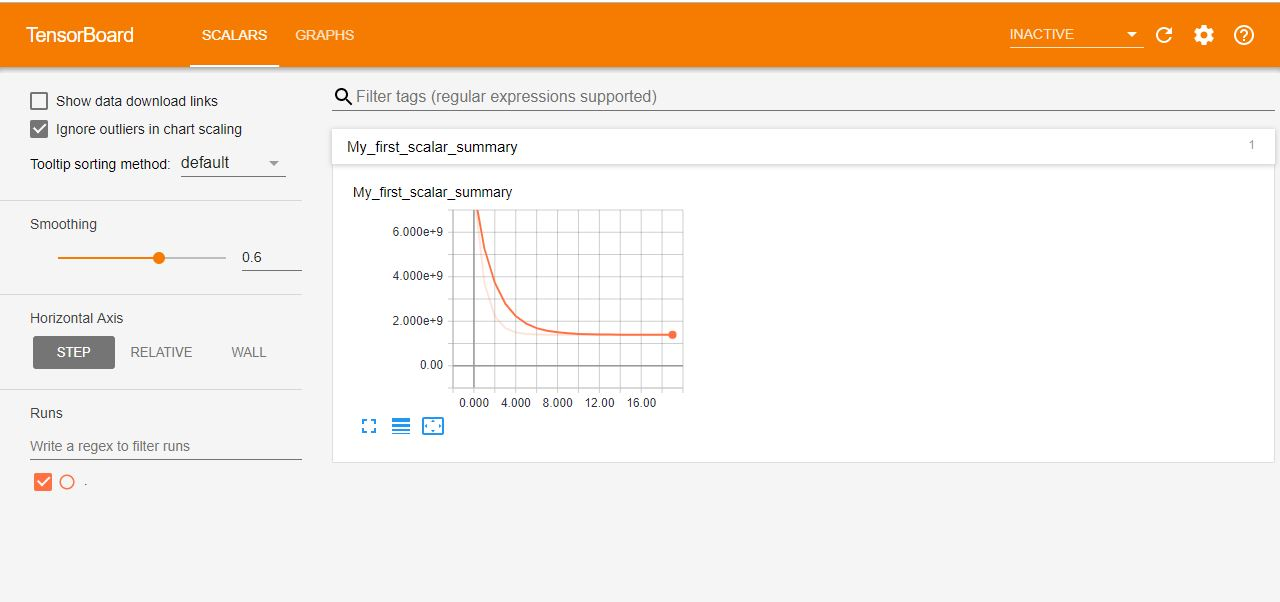

## Quinta sesion 

In [11]:
# epochs 
num_steps = 20

with tf.Session(graph = grafo1) as session5:
    # incializando variables
    tf.global_variables_initializer().run()
    print('Initialized')
    writer = tf.summary.FileWriter('./graphs5', session5.graph)
    for step in range(num_steps): 
        erro, optimi = session5.run([error, optimizacion],feed_dict={ph_lr:0.001})
        summary = session5.run(first_summary)
        writer.add_summary(summary, step)
        if (step % 2 == 0):
            print("Iteracion:", step, "Error:", erro, "Beta1:", session5.run(estim1), "Beta0:", session5.run(estim0))

Initialized
Iteracion: 0 Error: 19409722053.22175 Beta1: 1187.9476738013698 Beta0: 180.59027739726028
Iteracion: 2 Error: 16691037688.989712 Beta1: 3423.027025827415 Beta0: 519.7836368482165
Iteracion: 4 Error: 14382623015.88714 Beta1: 5482.682230497809 Beta0: 831.5860993870336
Iteracion: 6 Error: 12422564219.848362 Beta1: 7380.690953254504 Beta0: 1118.1489959296696
Iteracion: 8 Error: 10758290902.950506 Beta1: 9129.748772377116 Beta0: 1381.4546935229175
Iteracion: 10 Error: 9345166068.111794 Beta1: 10741.554165269812 Beta0: 1623.3298656357092
Iteracion: 12 Error: 8145288889.255072 Beta1: 12226.886819991127 Beta0: 1845.4577202120286
Iteracion: 14 Error: 7126478155.473637 Beta1: 13595.679796256922 Beta0: 2049.3892673420273
Iteracion: 16 Error: 6261409123.678334 Beta1: 14857.08601897411 Beta0: 2236.553701978986
Iteracion: 18 Error: 5526880628.846098 Beta1: 16019.539549423802 Beta0: 2408.2679712057325


## Gráfica error en el tiempo
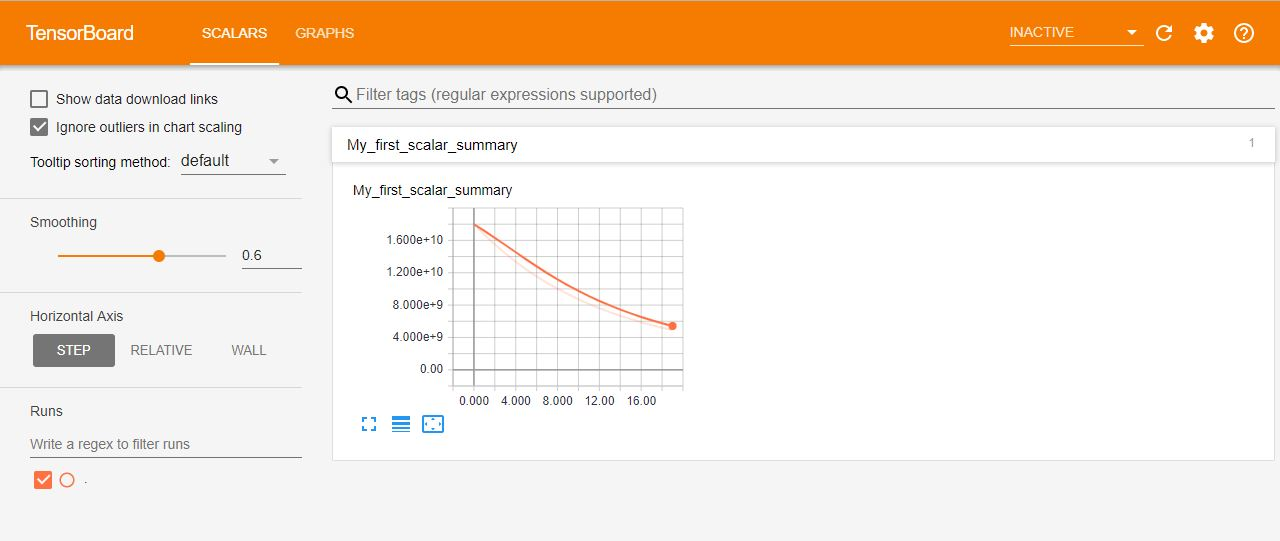

## Sexta sesion 

In [12]:
# epochs 
num_steps = 20

with tf.Session(graph = grafo1) as session6:
    # incializando variables
    tf.global_variables_initializer().run()
    print('Initialized')
    writer = tf.summary.FileWriter('./graphs6', session6.graph)
    for step in range(num_steps): 
        erro, optimi = session6.run([error, optimizacion],feed_dict={ph_lr:0.0001})
        summary = session6.run(first_summary)
        writer.add_summary(summary, step)
        if (step % 2 == 0):
            print("Iteracion:", step, "Error:", erro, "Beta1:", session6.run(estim1), "Beta0:", session6.run(estim0))

Initialized
Iteracion: 0 Error: 19409722053.22175 Beta1: 118.79476738013697 Beta0: 18.059027739726027
Iteracion: 2 Error: 19122686627.975704 Beta1: 354.9589844594252 Beta0: 53.954532151126685
Iteracion: 4 Error: 18840224439.06414 Beta1: 589.2354492233665 Beta0: 89.55528037486921
Iteracion: 6 Error: 18562262621.50269 Beta1: 821.6392607438452 Beta0: 124.86363007455051
Iteracion: 8 Error: 18288729471.25849 Beta1: 1052.1853973236489 Beta0: 159.88192005612407
Iteracion: 10 Error: 18019554426.75299 Beta1: 1280.8887174624333 Beta0: 194.61247041873182
Iteracion: 12 Error: 17754668050.659306 Beta1: 1507.7639608149607 Beta0: 229.05758270432935
Iteracion: 14 Error: 17494002011.989517 Beta1: 1732.8257491416748 Beta0: 263.21954004611473
Iteracion: 16 Error: 17237489068.46756 Beta1: 1956.0885872516717 Beta0: 297.10060731576993
Iteracion: 18 Error: 16985063049.18283 Beta1: 2177.5668639381292 Beta0: 330.70303126952433


## Gráfica error en el tiempo
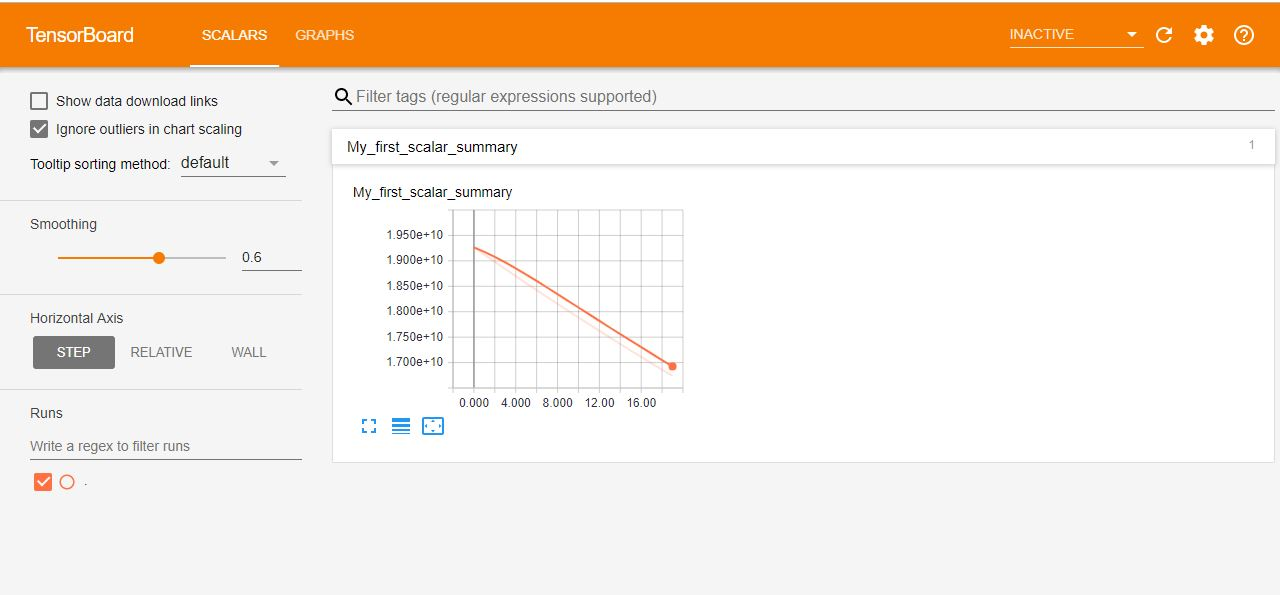

## Conclusiones y Recomendaciones
Luego de aplicar un enfoque de investigacion podemos observar como la hipotesis del modelo cuatro presenta un comportamiento esperado del error en el tiempo, el cual decrece de forma suavizada teniendo a cero.

Por lo que se recomienda utilizar el modelo 4 con un LR de 0.01

El cual dio como resultado lo siguiente:
Parametros entrenables: 
Beta1: 29765.937627907548 Beta0: 3720.169378324096

Hipotesis:
Y = 29765.937627907548 * X + 3720.169378324096

In [ ]:
feed_dict={lr1: 10, lr2: 1, lr3: 0.1, lr4: 0.01, lr5: 0.001, lr6: 0.0001}